In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# View first 5 rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Dataset info
df.info()

# Statistical summary
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 8.9 KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='str')

In [9]:
# Encode Genre column (Male/Female -> 0/1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


In [11]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


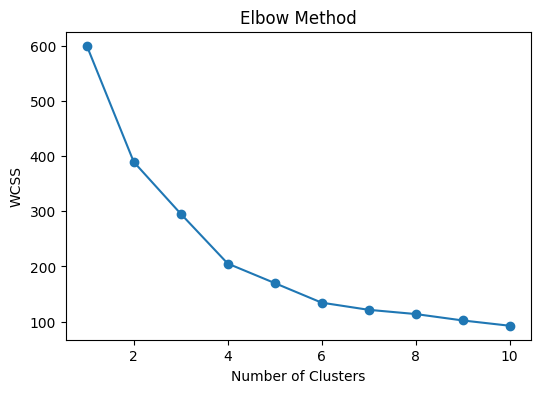

In [15]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [17]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters


In [19]:
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']


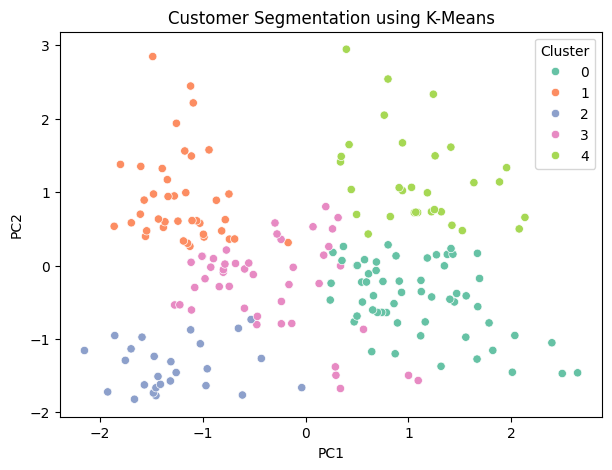

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title("Customer Segmentation using K-Means")
plt.show()


In [23]:
# Mean values per cluster
df.groupby('Cluster').mean()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,68.775862,0.568966,55.275862,47.620690,41.706897
1,161.025000,0.550000,32.875000,86.100000,81.525000
2,23.461538,0.576923,25.769231,26.115385,74.846154
3,86.377778,0.600000,26.733333,54.311111,40.911111
4,166.870968,0.483871,44.387097,89.774194,18.483871


Marketing Strategy Insights:

Cluster 0:
• Medium income, medium spending
• Target with discount offers & loyalty programs

Cluster 1:
• High income, high spending
• Premium products & exclusive memberships

Cluster 2:
• Low income, low spending
• Budget deals and promotional campaigns

Cluster 3:
• High income, low spending
• Personalized offers to increase engagement

Cluster 4:
• Young customers with high spending
• Trend-based and digital marketing campaigns

